In [ ]:
Data Aggregation
Problem Statement: Analyzing Sales Performance by Region in a Retail Company

In [ ]:
Task 1: Import the "Retail_Sales_Data.csv" Dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Retail_Sales_Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
Task 2: Explore the Dataset to Understand its Structure and Content

In [14]:
# Get basic information about the dataset
df.info()

# Check summary statistics
df.describe()

# Identify missing values
df.isnull().sum()

# Check unique values for important columns like 'Product Category' and 'Gender'
df['Product Category'].unique()
df['Gender'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


array(['Male', 'Female'], dtype=object)

In [15]:
# Check unique values for product category
df['Product Category'].unique()


array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
Task 4: Group Sales Data by Product Category and Calculate Total Sales Amount

In [16]:
# Group sales data by 'Product Category' and calculate total sales amount
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()

# Sort by total sales amount in descending order to identify top performers
sales_by_category = sales_by_category.sort_values(by='Total Amount', ascending=False)

# Display the top product categories by total sales
sales_by_category


,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


In [ ]:
Task 5: Create Bar Plots or Pie Charts to Visualize the Sales Distribution by Product Category

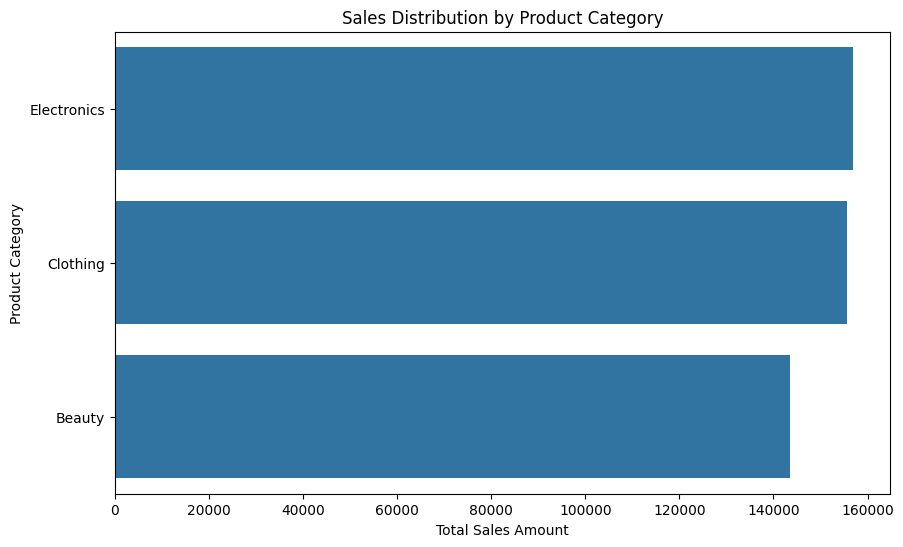

In [18]:
# Bar plot to visualize sales distribution by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Amount', y='Product Category', data=sales_by_category)
plt.title('Sales Distribution by Product Category')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Category')
plt.show()


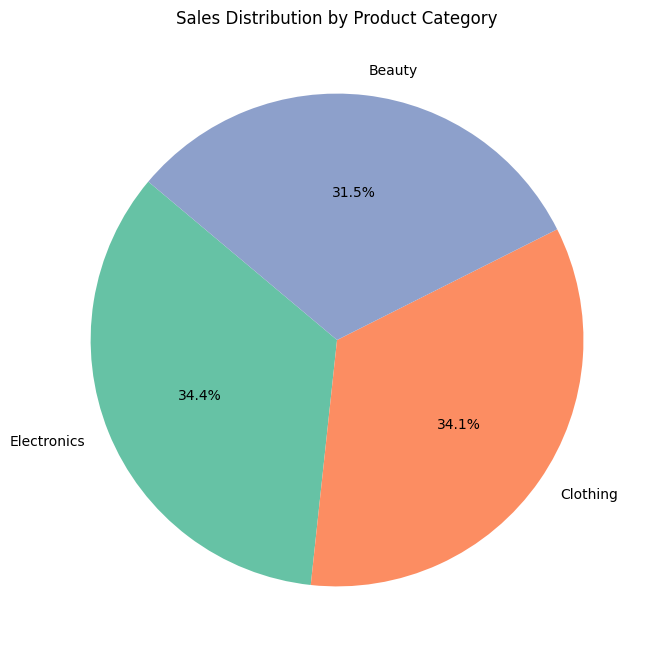

In [19]:
# Pie chart to visualize sales distribution by product category
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category['Total Amount'], labels=sales_by_category['Product Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(sales_by_category)))
plt.title('Sales Distribution by Product Category')
plt.show()


In [ ]:
Task 6: Identify the Top-Performing Product Categories Based on Highest Sales Amount

In [20]:
# Get the top 5 product categories by total sales
top_categories = sales_by_category.head(5)
top_categories


,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


In [ ]:
Task 7: Group the Sales Data by Product Category and Other Variables (Optional)

In [21]:
# Group by 'Gender' and 'Product Category' to calculate total sales amount
sales_by_gender_category = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().reset_index()

# Display the aggregated data
sales_by_gender_category


,Gender,Product Category,Total Amount
0,Female,Beauty,74830
1,Female,Clothing,81275
2,Female,Electronics,76735
3,Male,Beauty,68685
4,Male,Clothing,74305
5,Male,Electronics,80170


In [ ]:
Task 8: Create Stacked Bar Plots or Grouped Bar Plots to Compare Sales Amounts Across Product Categories and Demographics

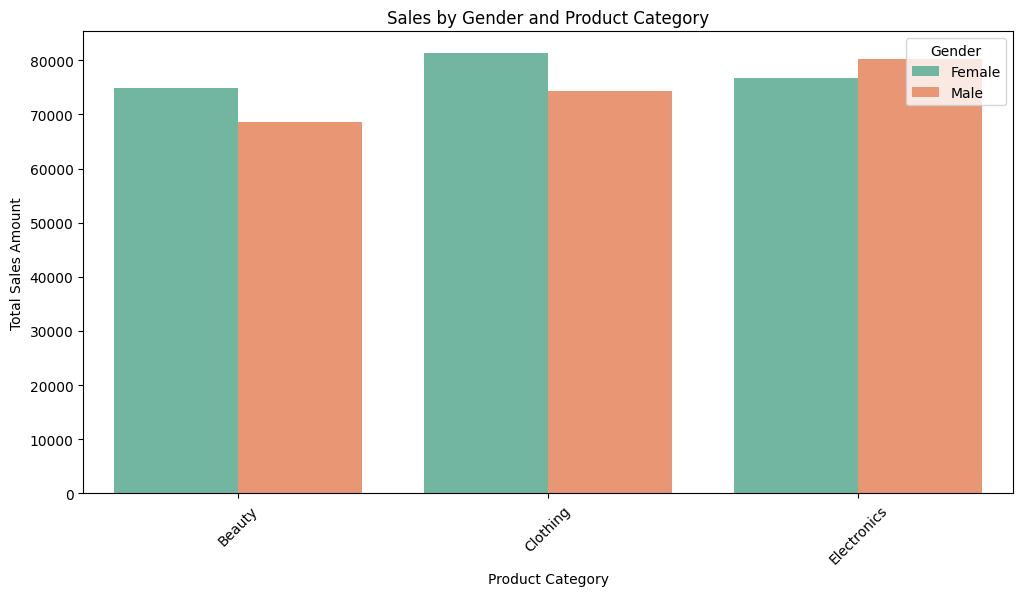

In [22]:
# Grouped bar plot to compare sales amounts across different product categories and gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Amount', hue='Gender', data=sales_by_gender_category, palette='Set2')
plt.title('Sales by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


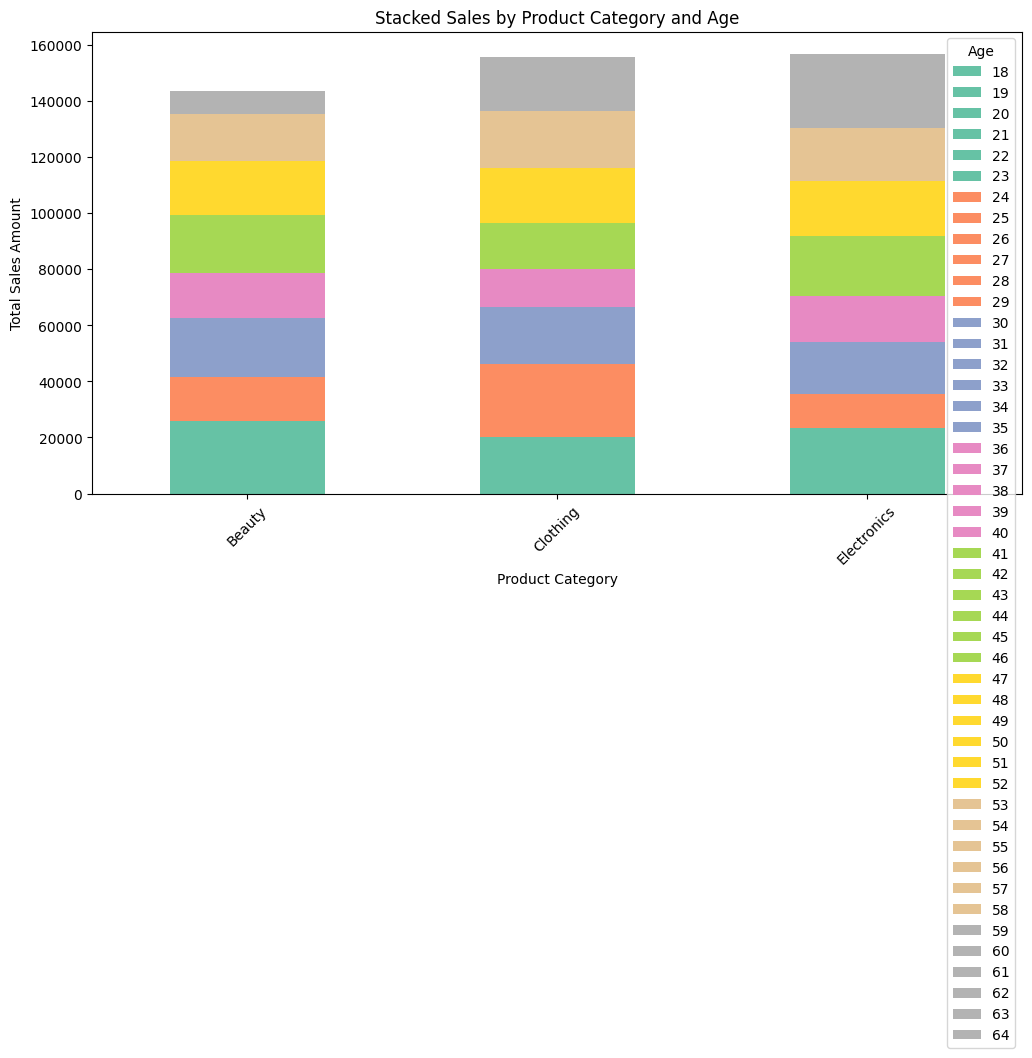

In [26]:


# Assuming df is already loaded
# Step 1: Group by Age and Product Category to aggregate sales
sales_by_age_category = df.groupby(['Age', 'Product Category'])['Total Amount'].sum().reset_index()

# Step 2: Pivot the data for stacked bar plot
sales_pivot_age = sales_by_age_category.pivot(index='Product Category', columns='Age', values='Total Amount')

# Step 3: Plot stacked bar chart
sales_pivot_age.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Stacked Sales by Product Category and Age')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Age')
plt.show()
